In [2]:
import pandas as pd
import matplotlib.pyplot as plt

lidl_blue = '#004fab'
lidl_red = '#e7030c'
lidl_yellow = '#fff000'

In [3]:
# load dataset
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
df = pd.read_csv(url, index_col=0)

# saved data also in folder to look at

# show data info
print(df.head())
print(df.info())

                chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

           

In [4]:
# check if data is missing
print(df.isnull().sum())

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [5]:
# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Korrelationen mit der Beliebtheitsspalte sortieren
popularities = correlation_matrix['winpercent'].sort_values(ascending=False)

print(popularities)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64


In [6]:
# remove winpercent from correlation matrix
# correlation_matrix = correlation_matrix.drop('winpercent', axis=1)

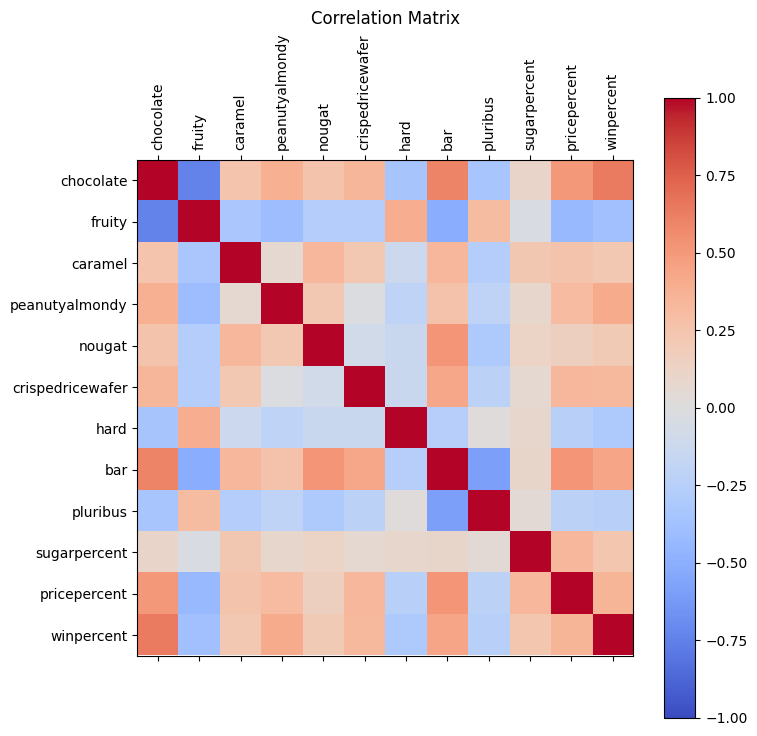

In [7]:
# visualizing the correlation 
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [12]:
# # get highest correlations from matrix
# highest_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# # print 
# print(highest_correlations)

pricepercent  pricepercent      1.000000
winpercent    chocolate         0.636517
bar           chocolate         0.597421
              nougat            0.522976
pricepercent  bar               0.518407
                                  ...   
fruity        peanutyalmondy   -0.399280
              pricepercent     -0.430969
              bar              -0.515066
bar           pluribus         -0.593409
fruity        chocolate        -0.741721
Length: 66, dtype: float64


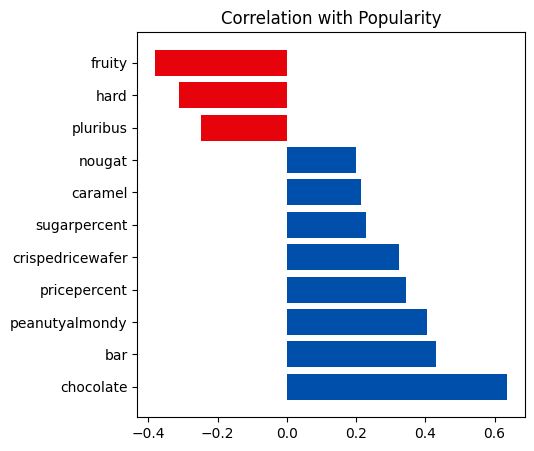

In [28]:
# dro pwinpercent from popularities
pop_bar = popularities.drop('winpercent', axis=0)

# visualize witih bar chart
plt.figure(figsize=(5, 5))
# plt.barh(pop_bar.index, pop_bar.values, color=lidl_blue)

# if positive, lidl_blue, if negative, lidl_red
for i in range(len(pop_bar)):
    if pop_bar[i] > 0:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_blue)
    else:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_red)

plt.title('Correlation with Popularity')
plt.show()